# Lecture 7 (High Dimensional Data)

## Libraries needed for this lecture 

We need to the following libraries for this lecture:


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat
from collections import Counter

from urllib.request import urlopen

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import minmax_scale

from sklearn import datasets 
from statsmodels import datasets as smdatasets

plt.rcParams['figure.figsize'] = 8,8

## Iris dataset

The [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a nice toy dataset that has 4 numerical features which makes it impossible to visualize as a whole.

In [2]:
iris = datasets.load_iris()
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Since we can visualize only two dimensions, we can plot one feature against the other. This gives us 6 possible graphs:

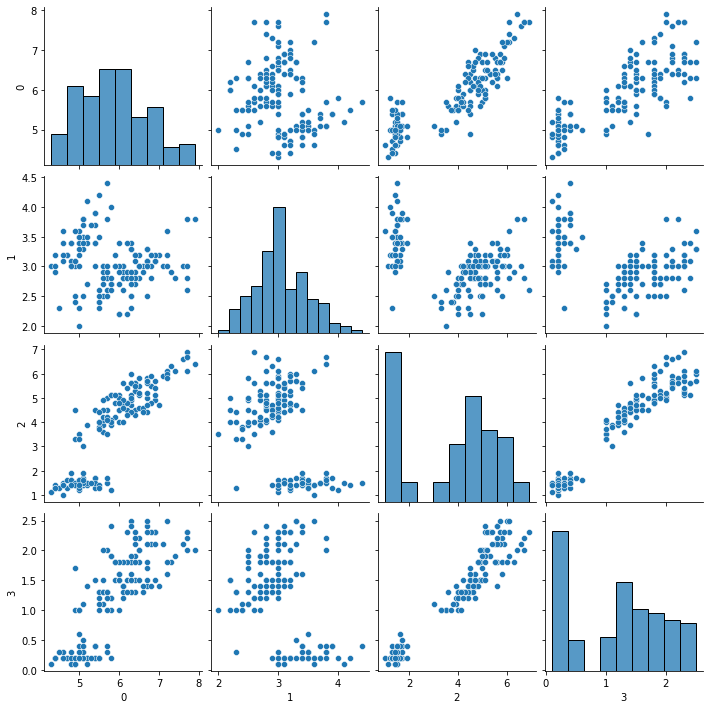

In [3]:
sns.pairplot(pd.DataFrame(iris['data']))

The plot on row 2 and column 3 looks interesting. Let us color the points using the target variable and look at it:

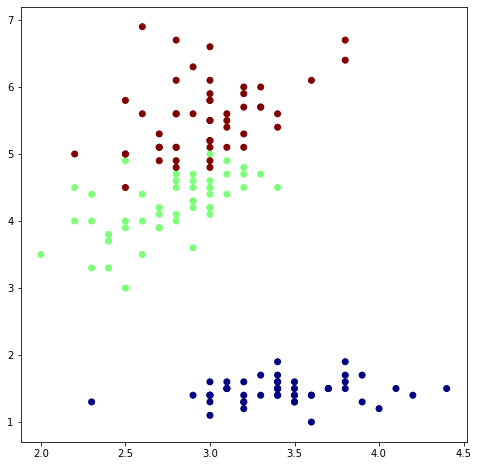

In [20]:
plt.scatter(iris['data'][:,1],iris['data'][:,2],c=iris['target'],cmap='jet')

There is a better way of projecting a high dimensional numerical data to a small dimensional space. The method is called [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) which is a very neat application of linear algebra.

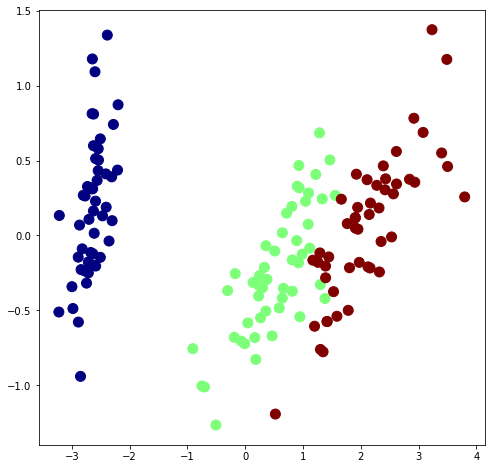

In [3]:
def project(data, target, size=100):
    projector = PCA(n_components=2)
    projected = projector.fit_transform(data)
    plt.scatter(projected[:,0],projected[:,1],c=target,cmap='jet',s=size)
    
project(iris['data'], iris['target'])

As you can see, we get an almost separation.

## The Wine Dataset

Next, let us look at the [wine dataset](https://archive.ics.uci.edu/ml/datasets/wine). This dataset has 13 numerical features which means it lives in a 13 dimensional space. This means we can't visualize it as is. But, as before we can plot pairs of variables against each other:

In [4]:
wine = datasets.load_wine()
wine['data'].shape

(178, 13)

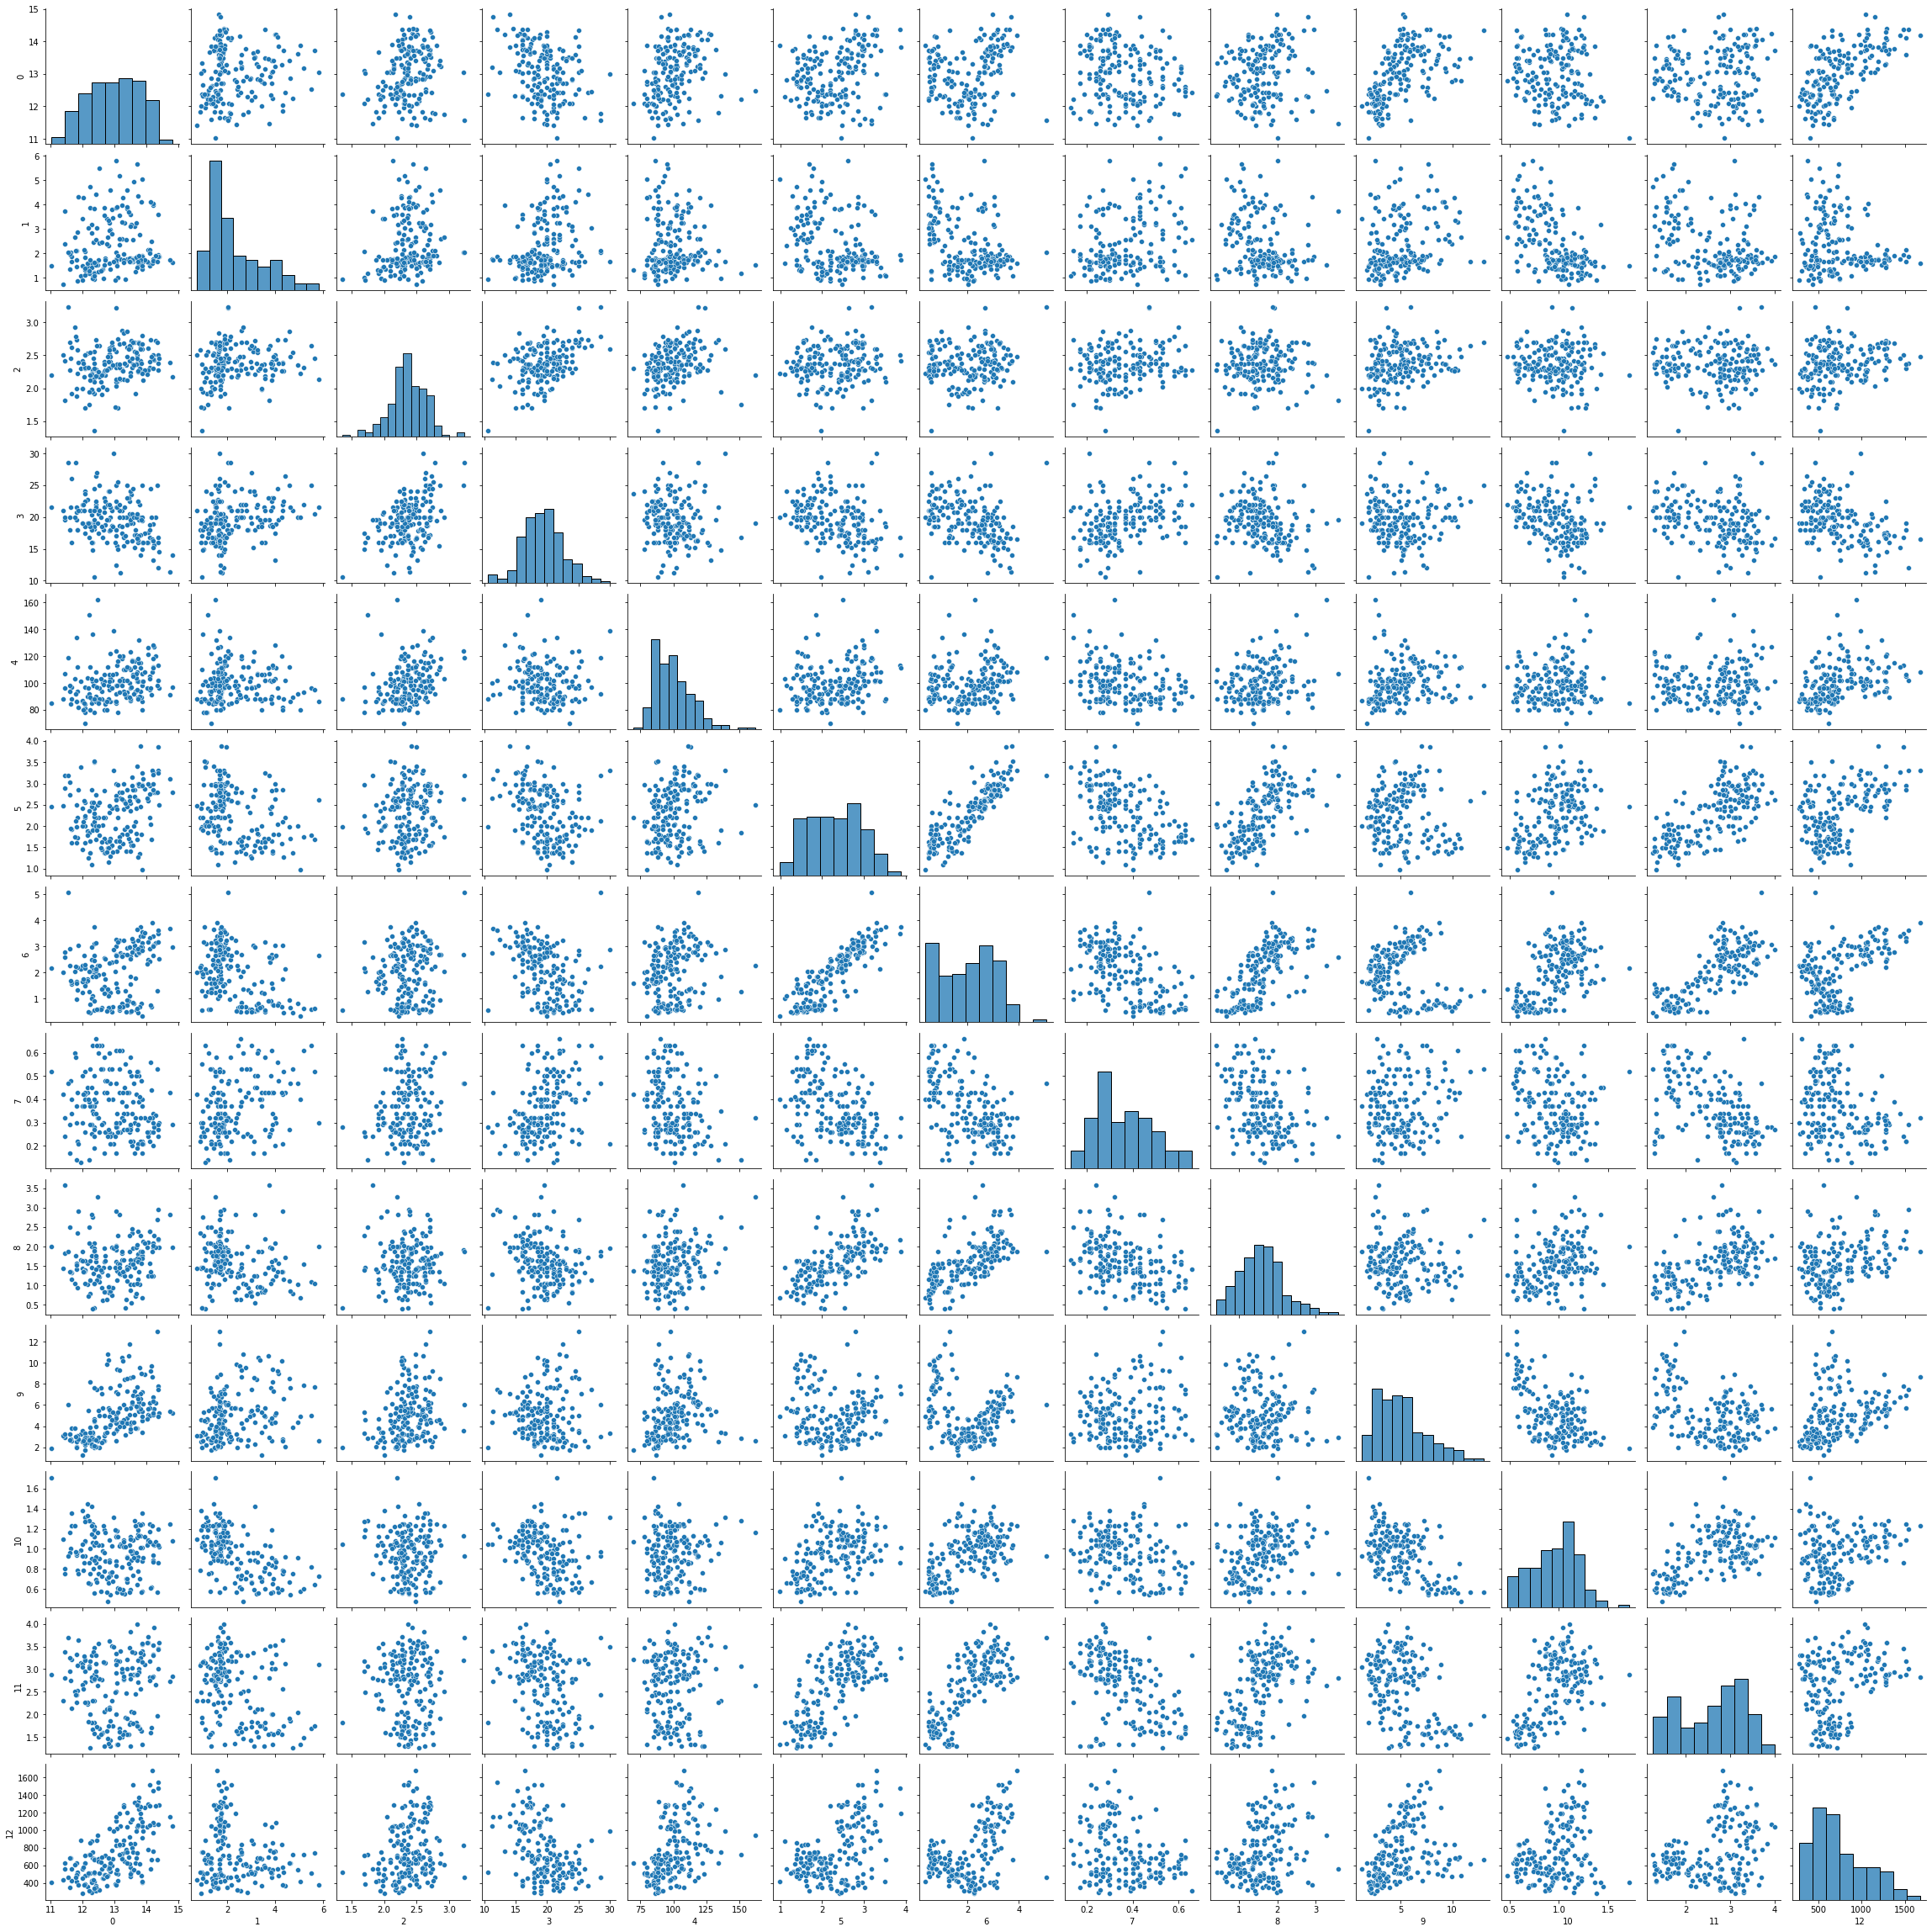

In [42]:
sns.pairplot(pd.DataFrame(wine['data']))

The row 7 and column 10 looks interesting. Let us color the points and look at them:

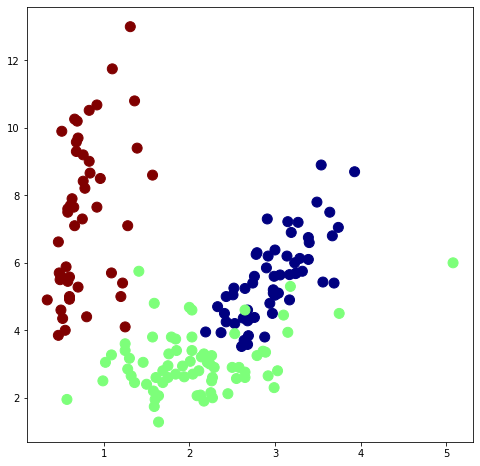

In [46]:
plt.scatter(wine['data'][:,6],wine['data'][:,9],c=wine['target'],cmap='jet',s=100)

We got lucky: green and blue points are almost separable. Let us see if PCA works for this dataset.

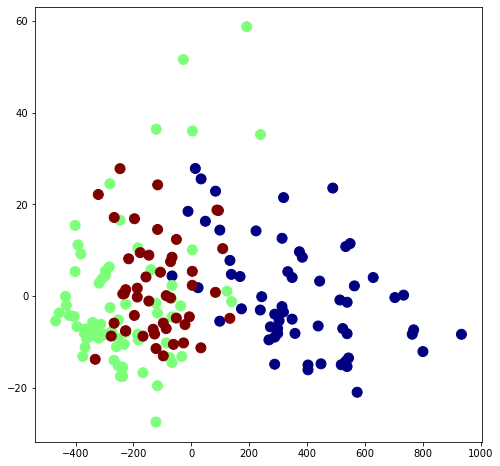

In [44]:
project(wine['data'],wine['target'])

Unfortunately, the result looks worse than our lucky choice. Then there is an even better projection method called [Linear Discriminant Analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis):

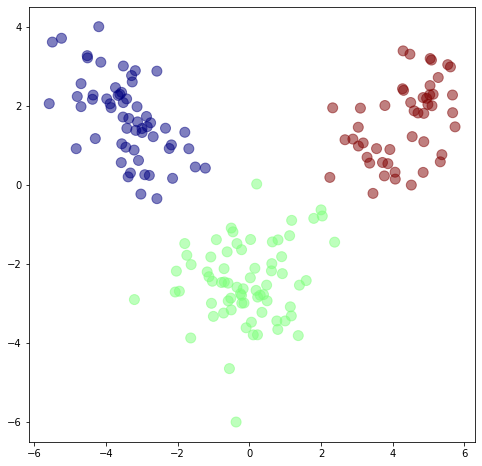

In [5]:
def smartProject(data, target, dim=2, a=0.5, size=100):
    smproj = LinearDiscriminantAnalysis(n_components=dim)
    points = smproj.fit_transform(data, target)
    xs = points[:,0]
    ys = points[:,1]
    plt.scatter(xs,ys,c=target,cmap='jet',alpha=a,s=size)
    
smartProject(wine['data'],wine['target'])

We were able to separate 3 classes of wine by finding a suitable projection from $\mathbb{R}^{13}\to \mathbb{R}^2$. Let us see if this also works for the iris dataset:

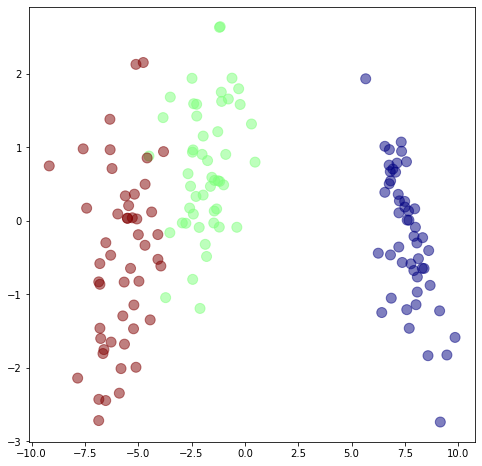

In [48]:
smartProject(iris['data'],iris['target'])

The result looks very similar to the projection we got for the PCA method.

## The US Congress Dataset

This time we are going to look at the [US Congress Dataset](https://www.statsmodels.org/devel/datasets/generated/committee.html):

In [6]:
congress = smdatasets.committee.data.load_pandas()
congress.data

BILLS104  SIZE  SUBS  STAFF  PRESTIGE  BILLS103
0        6.0  58.0  13.0  109.0       1.0       9.0
1       23.0  42.0   0.0   39.0       1.0     101.0
2       44.0  13.0   2.0   25.0       1.0      54.0
3      355.0  39.0   5.0   23.0       1.0     542.0
4      125.0  51.0   5.0   61.0       0.0     101.0
5      131.0  43.0   5.0   69.0       0.0     158.0
6      271.0  49.0   4.0   79.0       0.0     196.0
7       63.0  44.0   3.0   68.0       0.0      40.0
8      149.0  51.0   7.0   99.0       0.0      72.0
9      253.0  35.0   5.0   56.0       0.0     168.0
10      81.0  49.0   5.0   46.0       0.0      60.0
11      89.0  55.0   7.0   48.0       0.0      75.0
12     142.0  44.0   5.0   58.0       0.0      98.0
13     155.0  61.0   6.0   74.0       0.0      69.0
14      27.0  50.0   4.0   58.0       0.0      25.0
15       8.0  43.0   4.0   29.0       0.0       9.0
16      28.0  33.0   3.0   36.0       0.0      41.0
17      68.0  12.0   0.0   24.0       0.0     233.0
18       1.0  10.0   0.0    9.0       0.0       0.0
19       4.0  16.0   2.0   24.0       0.0       2.0

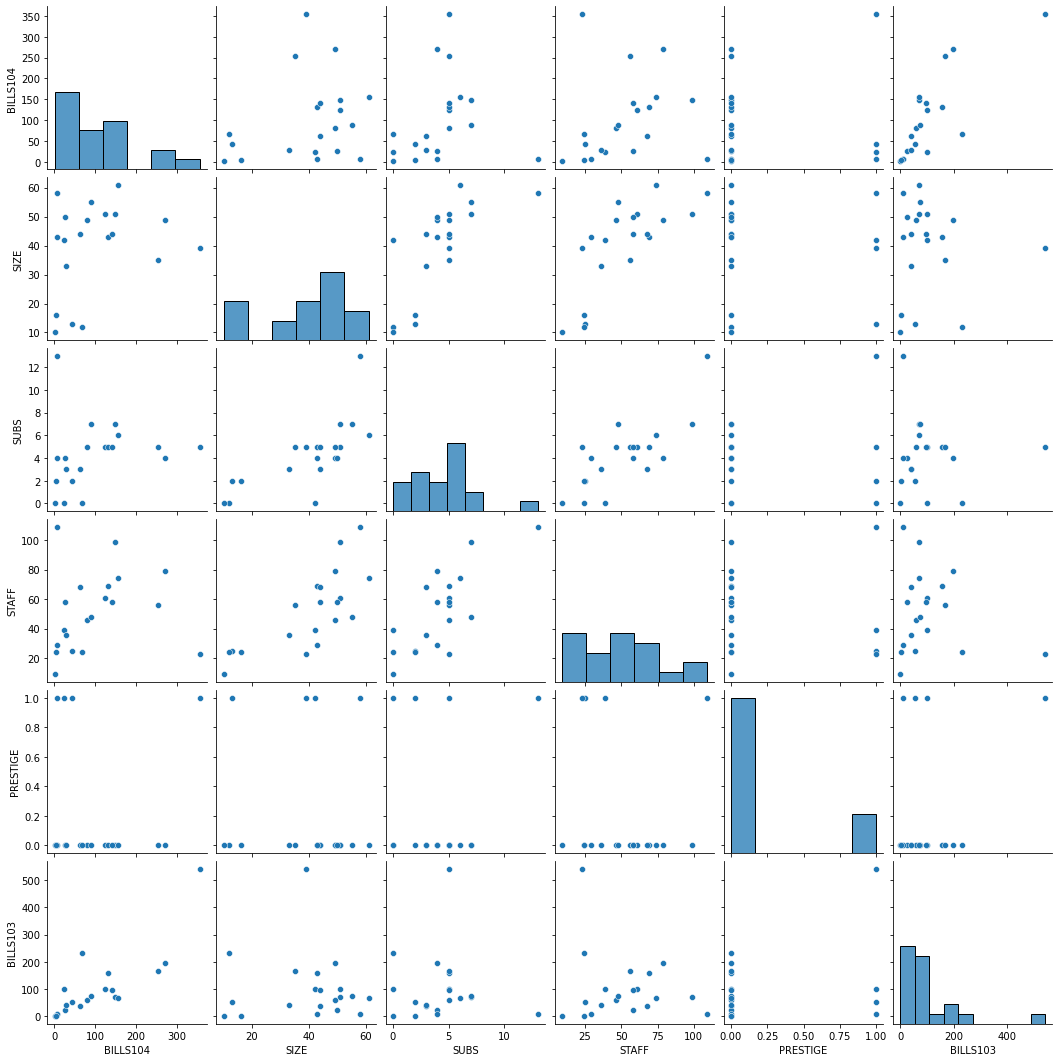

In [29]:
sns.pairplot(congress.data)

Looks pretty bad, not easy to understand. Let us project the data:

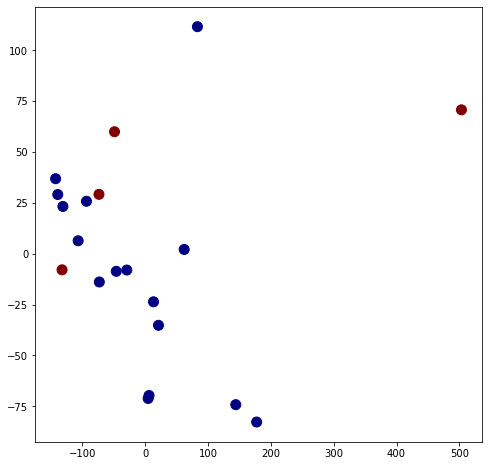

In [49]:
project(congress.data,congress.data['PRESTIGE'])

The red points and the blue points are not easy to separate. Let us try the other projection method we had:

In [32]:
smartProject(congress.data,congress.data['PRESTIGE'],dim=2,a=0.6)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

The error says that our smarter projection method found a 1-dimensional projection method. I need to go back and change the function, or redefine it:

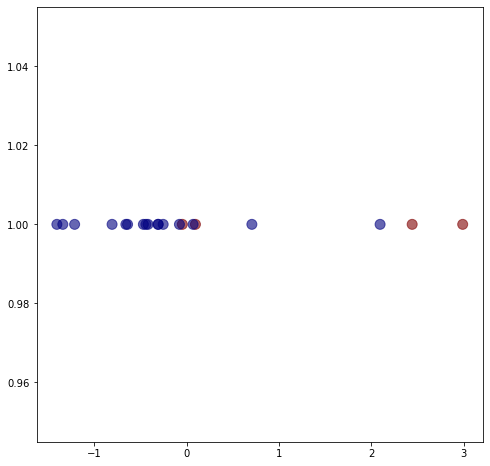

In [50]:
def smartProject(data, target, dim=2, a=0.5, size=100):
    smproj = LinearDiscriminantAnalysis(n_components=dim)
    points = smproj.fit_transform(data, target)
    xs = points[:,0]
    if dim<2:
        ys = np.ones(target.shape[0])
    else:
        ys = points[:,1]
    plt.scatter(xs,ys,c=target,cmap='jet',alpha=a,s=size)
    
smartProject(congress.data,congress.data['PRESTIGE'],dim=1,a=0.6)

Well... It didn't work. No worries, we have yet another way of projecting the data called [t-Stochastic Neighboring Embedding (tSNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding):

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


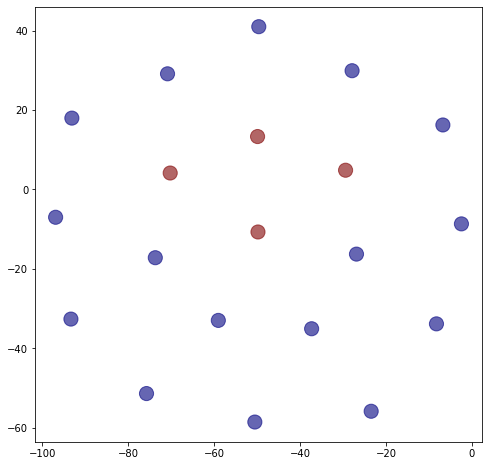

In [7]:
def verySmartProj(data,target, dim=2, a=0.6, how='pca', rate='auto'):
    projector = TSNE(n_components=dim, init=how, learning_rate=rate)
    points = projector.fit_transform(data,target)
    plt.scatter(points[:,0],points[:,1],c=target,alpha=a, cmap='jet', s=200)
    
verySmartProj(congress.data,congress.data['PRESTIGE'])

Let us see if this works for the other datasets too:

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


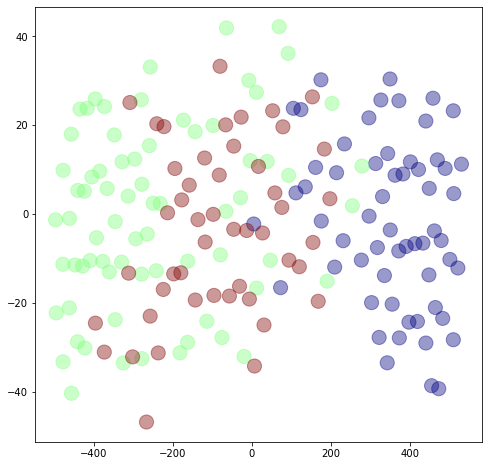

In [38]:
verySmartProj(wine['data'],wine['target'],a=0.4)

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


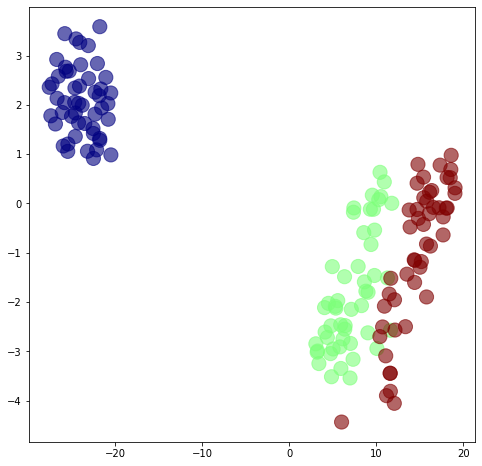

In [39]:
verySmartProj(iris['data'],iris['target'])

## Newsgroup Dataset

In [51]:
newsgroups = datasets.fetch_20newsgroups_vectorized()
newsgroups['data'].shape

(11314, 130107)

In [52]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [53]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

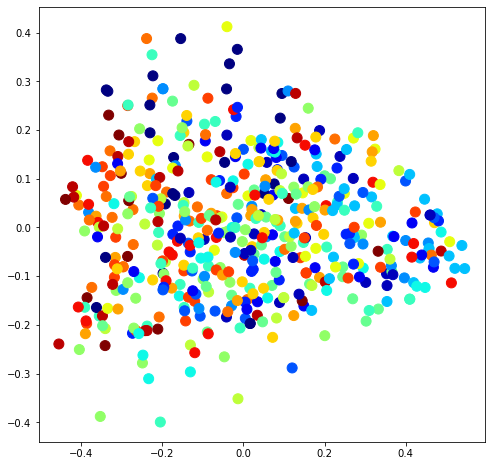

In [54]:
N = newsgroups.target.shape[0]
ns = np.random.randint(0,N,500)
X = newsgroups.data[ns,:]
y = newsgroups.target[ns]

project(X.toarray(),y)

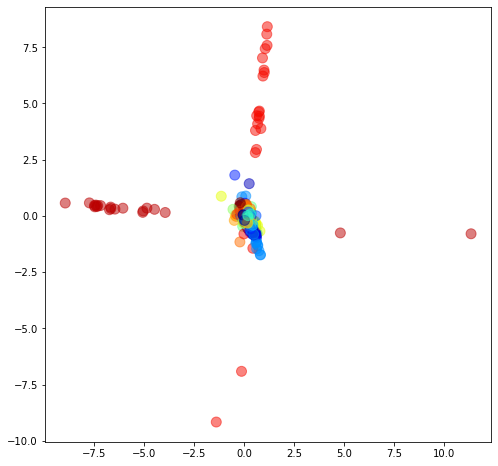

In [55]:
smartProject(X.toarray(),y)

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


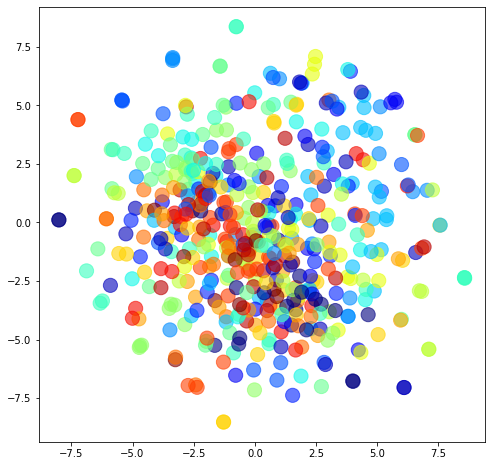

In [56]:
verySmartProj(X.toarray(),y)

## Hyperspectral Satellite Image Data

If you recall from our last lecture, a color image has three channels for each primary colors: red, blue and green. A [hyperspectral image](https://www.spiedigitallibrary.org/journals/journal-of-biomedical-optics/volume-19/issue-01/010901/Medical-hyperspectral-imaging-a-review/10.1117/1.JBO.19.1.010901.full?SSO=1) on the other hand, contains hundreds of channels where each channel is a grayscale image taken at a specific wavelength:

![hyperspectral image 2](https://www.spiedigitallibrary.org/ContentImages/Journals/JBOPFO/19/1/010901/FigureImages/JBO_19_1_010901_f001.png)

Source:[Medical Hyperspectral Imaging](https://www.spiedigitallibrary.org/journals/journal-of-biomedical-optics/volume-19/issue-01/010901/Medical-hyperspectral-imaging-a-review/10.1117/1.JBO.19.1.010901.full?SSO=1)

### Indian Pines Hyperspectral Image Dataset

The [Indian Pines hyperspectral image dataset](http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines) is a $145\times 145$-pixel 200-channels satellite image of Indian Pines region in the Northwest Indiana, US. The region contains two-thirds agriculture, and one-third forest or other natural perennial vegetation.

In [8]:
pine = loadmat('./data/Indian_pines_corrected.mat')
labels = loadmat('./data/Indian_pines_gt.mat')

In [9]:
pine['indian_pines_corrected'].shape

(145, 145, 200)

In [10]:
labels['indian_pines_gt'].shape

(145, 145)

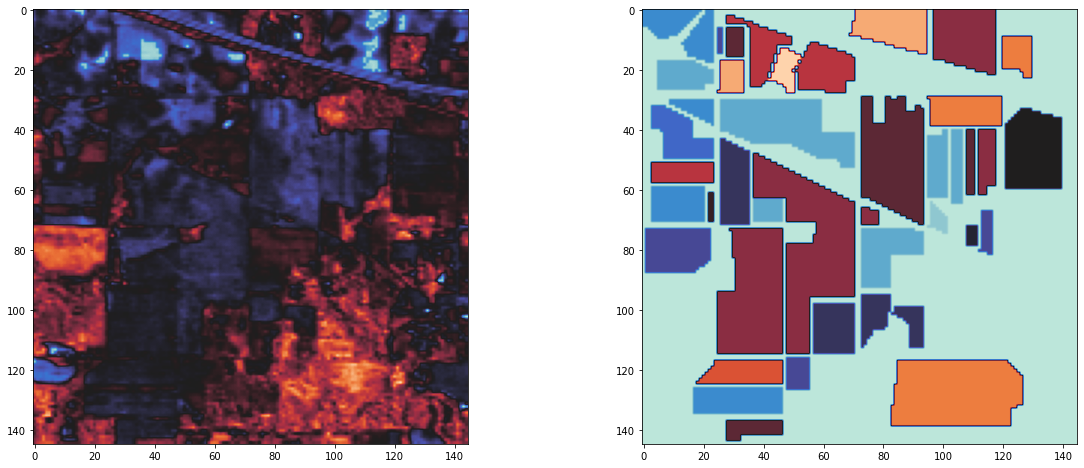

In [26]:
m = np.random.randint(200)

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(pine['indian_pines_corrected'][:,:,m], cmap='icefire')
ax[1].imshow(labels['indian_pines_gt'], cmap='icefire')

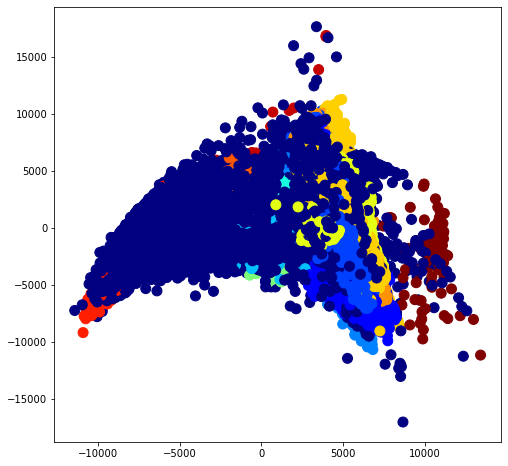

In [27]:
X = pine['indian_pines_corrected'].reshape(145*145,200)
y = labels['indian_pines_gt'].reshape(145*145)
project(X,y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


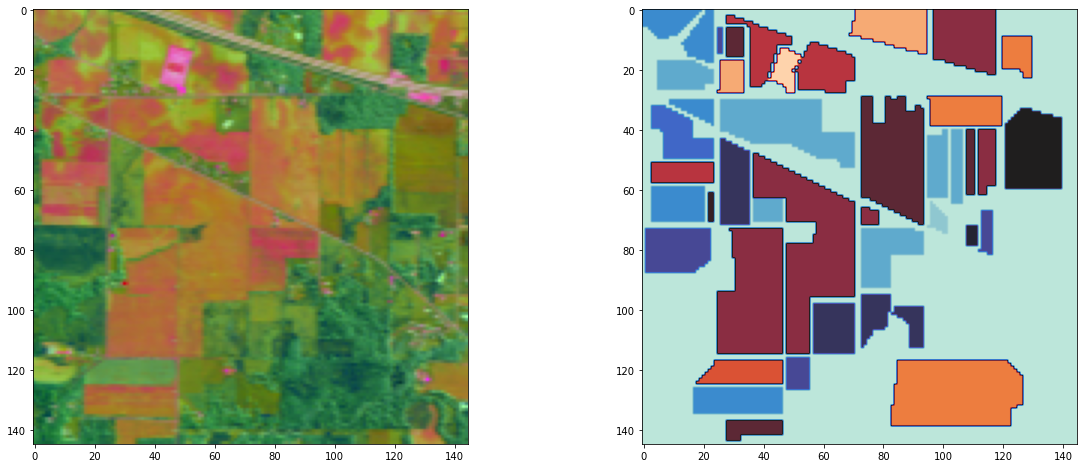

In [31]:
model = PCA(n_components=3)
img = minmax_scale(model.fit_transform(X))
img = img.reshape((145,145,3))

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(img, cmap='jet')
ax[1].imshow(labels['indian_pines_gt'], cmap='icefire')

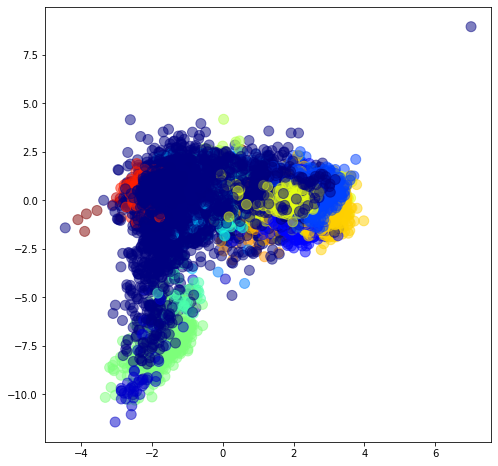

In [66]:
smartProject(X,y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


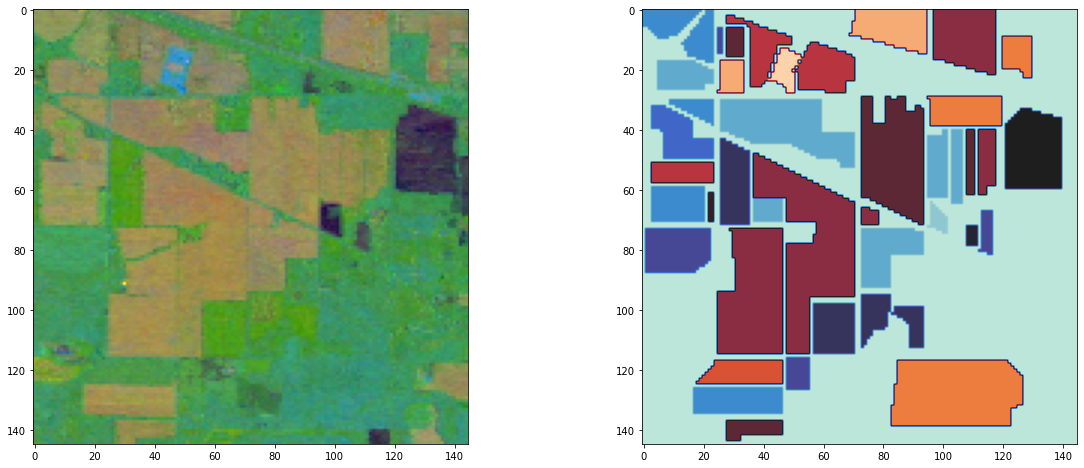

In [32]:
model = LinearDiscriminantAnalysis(n_components=3)
img = minmax_scale(model.fit_transform(X,y))
img = img.reshape((145,145,3))

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(img, cmap='icefire')
ax[1].imshow(labels['indian_pines_gt'], cmap='icefire')

## Olivetti Face Dataset


In [34]:
faces = datasets.fetch_olivetti_faces(data_home='/home/kaygun/local/data/scikit_learn_data/')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/kaygun/local/data/scikit_learn_data/


In [36]:
faces['data'].shape

(400, 4096)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


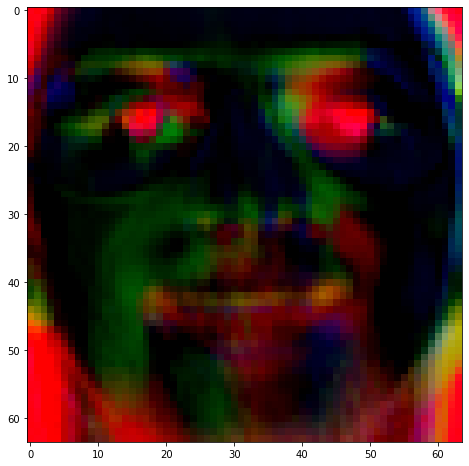

In [71]:
m = np.random.randint(40)
tmp = faces['data'][m*10:m*10+10,:].transpose()

model = PCA(n_components=3)
new = model.fit_transform(tmp)

plt.imshow(new.reshape((64,64,3)))

### Text Data

In [79]:
import spacy
import nltk
import re

from collections import Counter

from sklearn.preprocessing import minmax_scale
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [78]:
sentence = "Here we go again! This example is not a good one."
Counter([re.sub('[^a-zA-Z]','',x.lower()) for x in sentence.split()])

Counter({'here': 1,
         'we': 1,
         'go': 1,
         'again': 1,
         'this': 1,
         'example': 1,
         'is': 1,
         'not': 1,
         'a': 1,
         'good': 1,
         'one': 1})

In [80]:
with urlopen('https://www.gutenberg.org/ebooks/10571.txt.utf-8') as url:
    raw = url.read().decode('utf-8')
raw

'\ufeffThe Project Gutenberg EBook of The Old Man of the Sea, by W.W. Jacobs\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: The Old Man of the Sea\r\n       Ship\'s Company, Part 11.\r\n\r\nAuthor: W.W. Jacobs\r\n\r\nRelease Date: January 1, 2004 [EBook #10571]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK THE OLD MAN OF THE SEA ***\r\n\r\n\r\n\r\n\r\nProduced by David Widger\r\n\r\n\r\n\r\n\r\nSHIP\'S COMPANY\r\n\r\nBy W.W. Jacobs\r\n\r\n\r\n\r\nTHE OLD MAN OF THE SEA\r\n\r\n\r\n"What I want you to do," said Mr. George Wright, as he leaned towards the\r\nold sailor, "is to be an uncle to me."\r\n\r\n"Aye, aye," said the mystified Mr. Kemp, pausing with a mug of beer\r\nmidway to his lips.\r\n\r\n"A rich uncle," continued 

In [81]:
document = nlp(raw)
sentences = list(document.sents)
len(sentences)

441

In [110]:
m = np.random.randint(441)
sentences[m]



"A rich uncle," continued the young man, lowering his voice to prevent
any keen ears in the next bar from acquiring useless knowledge.

In [111]:
data = [re.sub('[^A-Za-z ]','',x.text.lower()) for x in sentences]
data

['the project gutenberg',
 'ebook of the old man of the sea by ww jacobsthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever',
 ' you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle the old man of the sea       ships company part ',
 'author ww jacobsrelease date january  ',
 'ebook language english start of this project gutenberg ebook the old man of the sea produced by david widgerships companyby ww jacobsthe old man of the seawhat i want you to do said mr george wright as he leaned towards theold sailor is to be an uncle to me',
 'aye aye said the mystified mr kemp pausing with a mug of beermidway to his lips',
 'a rich uncle continued the young man lowering his voice to preventany keen ears in the next bar from acquiring useless knowledge',
 ' anuncle from new zealand who is going to leave me all is money',
 'wheres it coming from',
 ' demanded

In [114]:
vectorizer = CountVectorizer()
vs = vectorizer.fit_transform(data).toarray()
vs.shape

(441, 1848)

In [116]:
tmp = np.matmul(vs,vs.transpose())
tmp.shape

(441, 441)

In [117]:
tmp1 = np.matmul(vs.transpose(),vs)
tmp1.shape

(1848, 1848)

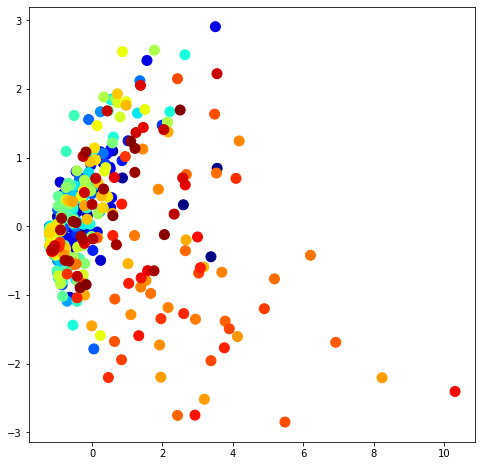

In [115]:
project(vs,range(441))

In [118]:
res = minmax_scale(np.matmul(vs,vs.transpose()))
res.shape

(441, 441)

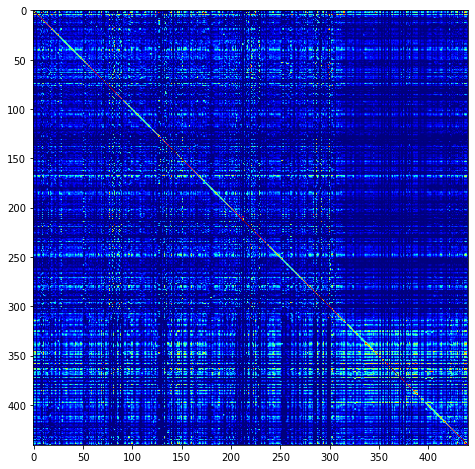

In [119]:
plt.imshow(res,cmap='jet')

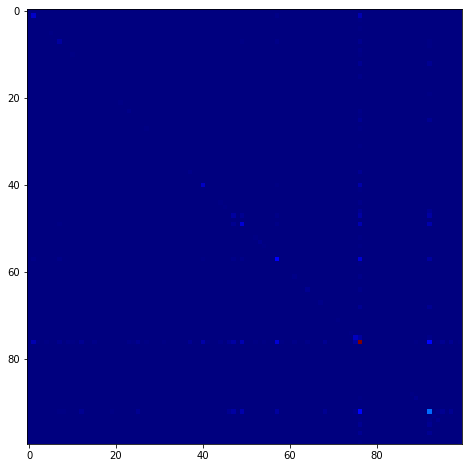

In [121]:
plt.imshow(tmp1[:100,:100],cmap='jet')

In [93]:
img = (res*255).astype(int)
img

array([[255,  18,  70, ...,  28,  30,   0],
       [ 18, 255,  69, ...,  25,  34,  35],
       [ 70,  69, 255, ...,  23,  30,  23],
       ...,
       [ 28,  25,  23, ..., 255,  95,  33],
       [ 30,  34,  30, ...,  95, 255,  31],
       [  0,  35,  23, ...,  33,  31, 255]])

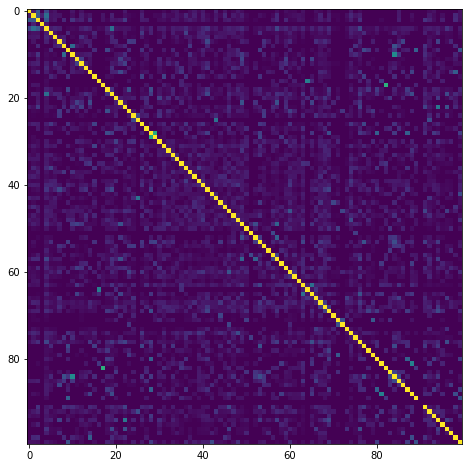

In [94]:
plt.imshow(img[:100,:100])